<a href="https://colab.research.google.com/github/OmPShinde/DC-Micro-Project/blob/main/ASK_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter RFID Tag ID (decimal): 12
======= RFID ASK Simulation =======
RFID Tag ID (Decimal): 12
RFID Tag ID (Binary): 00001100
Number of Bits: 8
Bit Duration (Tb): 1 sec
Bit Rate: 1.0 bps
Carrier Frequency (fc): 20 Hz
Sampling Frequency (Fs): 1000 Hz


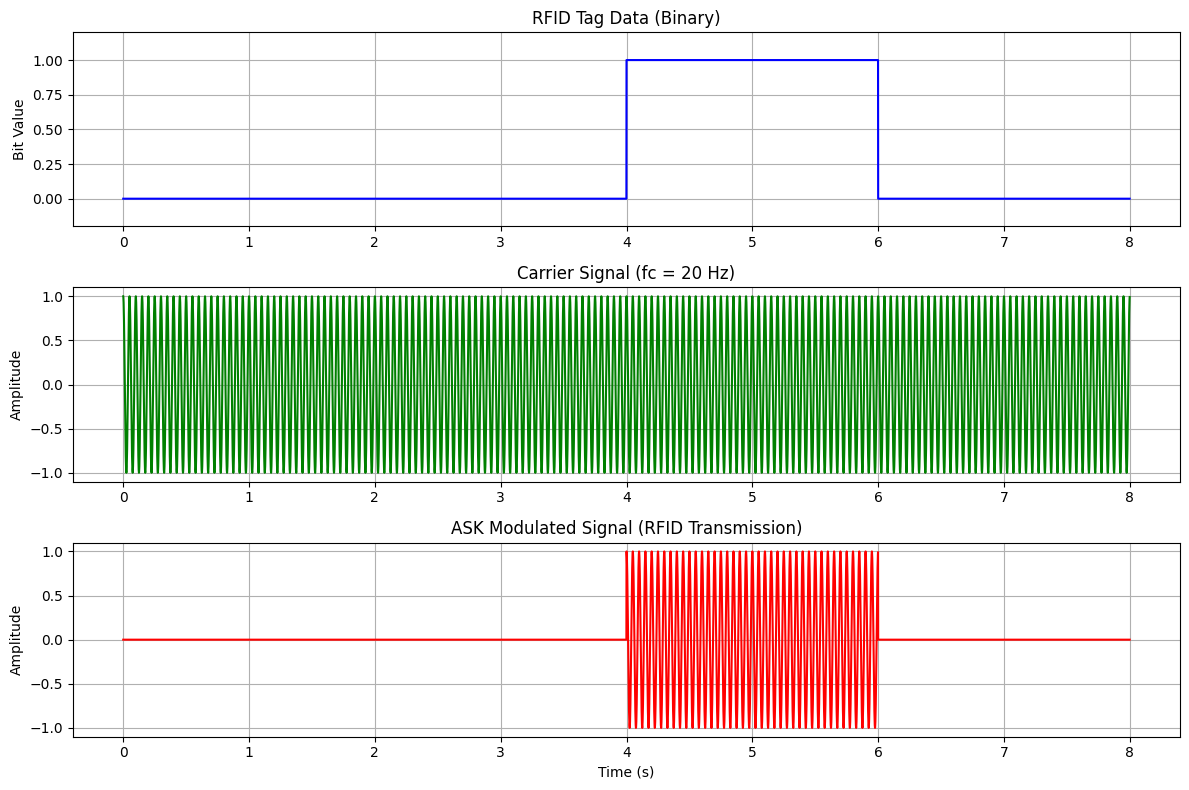

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# Parameters
# ===============================
Fs = 1000      # Sampling frequency (samples/sec)
Tb = 1         # Bit duration (sec)
fc = 20        # Carrier frequency (Hz)

# ===============================
# User Input for RFID Tag
# ===============================
rfid_id = int(input("Enter RFID Tag ID (decimal): "))

# Manual Decimal → Binary Conversion
binary_data = []
num = rfid_id
while num > 0:
    remainder = num % 2
    binary_data.append(remainder)
    num = num // 2
binary_data = binary_data[::-1]  # Reverse MSB→LSB

# Ensure 8-bit representation
while len(binary_data) < 8:
    binary_data.insert(0, 0)

data_bits = binary_data
n_bits = len(data_bits)

# ===============================
# Print Parameters
# ===============================
print("======= RFID ASK Simulation =======")
print("RFID Tag ID (Decimal):", rfid_id)
print("RFID Tag ID (Binary):", ''.join(str(b) for b in data_bits))
print("Number of Bits:", n_bits)
print("Bit Duration (Tb):", Tb, "sec")
print("Bit Rate:", 1/Tb, "bps")
print("Carrier Frequency (fc):", fc, "Hz")
print("Sampling Frequency (Fs):", Fs, "Hz")
print("===================================")

# ===============================
# Time Vector
# ===============================
t = np.arange(0, Tb*n_bits, 1/Fs)  # Single time vector for all plots

# ===============================
# Carrier Signal
# ===============================
carrier_signal = np.cos(2*np.pi*fc*t)

# ===============================
# Binary Signal (expanded to match time vector)
# ===============================
binary_signal = np.repeat(data_bits, Fs*Tb)

# ===============================
# ASK Signal
# ===============================
ask_signal = carrier_signal * binary_signal  # Carrier ON when bit=1, OFF when bit=0

# ===============================
# Plotting
# ===============================
plt.figure(figsize=(12,8))

# Binary Data
plt.subplot(3,1,1)
plt.plot(t, binary_signal, 'b')
plt.title("RFID Tag Data (Binary)")
plt.ylabel("Bit Value")
plt.grid(True)
plt.ylim(-0.2, 1.2)  # better visualization

# Carrier Signal
plt.subplot(3,1,2)
plt.plot(t, carrier_signal, 'g')
plt.title("Carrier Signal (fc = {} Hz)".format(fc))
plt.ylabel("Amplitude")
plt.grid(True)

# ASK Signal
plt.subplot(3,1,3)
plt.plot(t, ask_signal, 'r')
plt.title("ASK Modulated Signal (RFID Transmission)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


